In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()

In [5]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [6]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

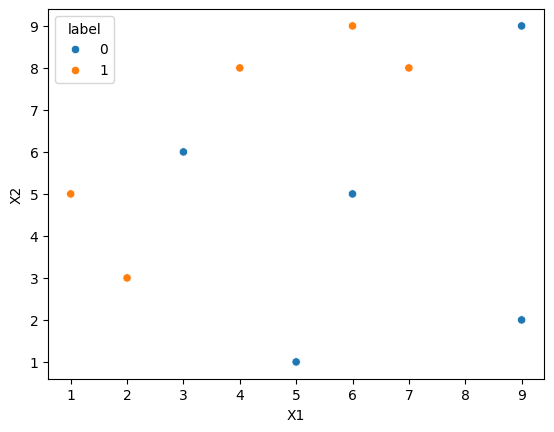

In [7]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [8]:
df['weights']=1/df.shape[0]

In [9]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [12]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [13]:
# step 2 - Train 1st model
dt1.fit(x,y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

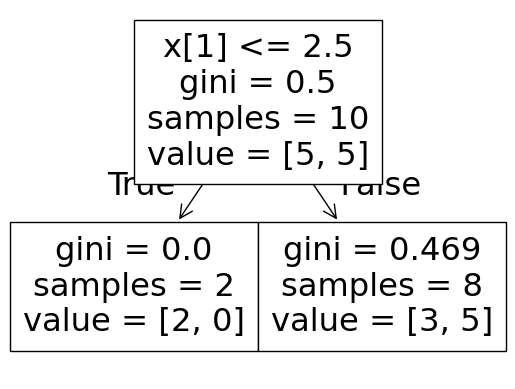

In [14]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

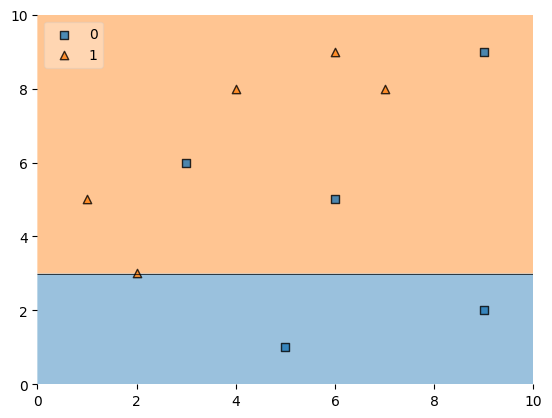

In [15]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [16]:
df['y_pred']=dt1.predict(x)

In [17]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [ ]:
# Misclassification here
# Row 3,7,9
# error = sum of their weigths
# error = 0.1+0.1+0.1 = 0.3

In [18]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [20]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
print(alpha1)

0.42364893019360184


In [22]:
# Step 4 - update weights
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [23]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [24]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [ ]:
print(df['updated_weights'].sum())
# Sum should be 1 - so we'll normalize the weights

0.9165153319682015


In [ ]:
# Step 5 - Normalize weight
df['normalized_weights']=(df['updated_weights']/df['updated_weights'].sum())

In [29]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [30]:
print(df['normalized_weights'].sum())

1.0


In [32]:
# Step 6 - Create range
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [33]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [34]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [ ]:
# Step 7 - create new dataset using random row
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if a < row['cumsum_upper'] and a > row['cumsum_lower']:
                indices.append(index)
    return indices

# This process is called upsampling

In [36]:
index_values = create_new_dataset(df)

In [37]:
print(index_values)

[6, 4, 3, 8, 3, 8, 5, 1, 3, 8]


In [39]:
second_df = df.iloc[index_values,[0,1,2,3]]
# df.iloc[choosen_rows,first 4 column]

In [40]:
second_df

,X1,X2,label,weights
6,6,5,0,0.1
4,5,1,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
1,2,3,1,0.1
3,4,8,1,0.1
8,9,9,0,0.1


In [42]:
# Train second decision tree

In [41]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [58]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values


In [59]:
dt2.fit(X,y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

[Text(0.5, 0.75, 'x[0] <= 4.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.625, 0.5, '  False')]

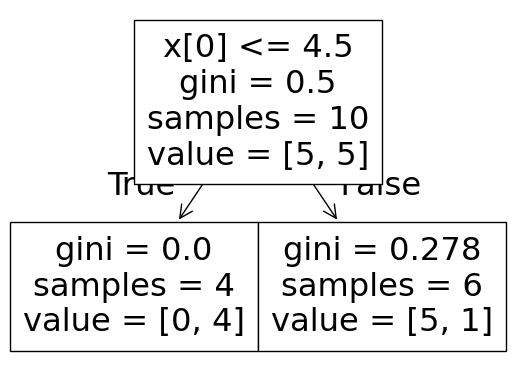

In [60]:
plot_tree(dt2)

<Axes: >

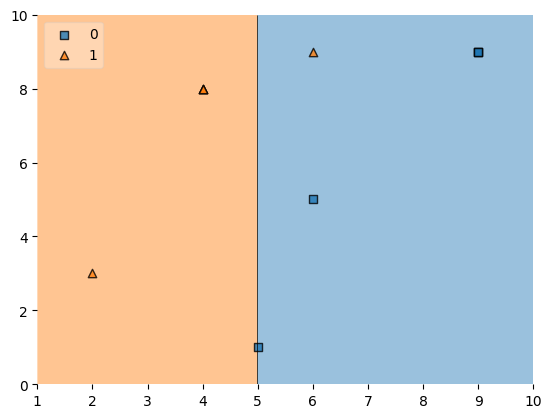

In [61]:
plot_decision_regions(X,y,clf=dt2,legend=2) 

In [64]:
second_df['y_pred'] = dt2.predict(X)

In [65]:
second_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
4,5,1,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,0
1,2,3,1,0.1,1
3,4,8,1,0.1,1
8,9,9,0,0.1,0


In [ ]:
# error = 0.1

In [70]:
alpha2 = calculate_model_weight(0.1)

In [71]:
print(alpha2)

1.0986122886681098


In [72]:
# Step 4 - update weights
def update_row_weights(row,alpha=1.09):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [73]:
second_df['updated_weights']=second_df.apply(update_row_weights,axis=1)

In [74]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
6,6,5,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
1,2,3,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622


In [77]:
second_df['normalized_weights']=second_df['updated_weights']/second_df['updated_weights'].sum()

In [78]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
6,6,5,0,0.1,0,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,0,0.297427,0.495694
1,2,3,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034


In [80]:
print(second_df['normalized_weights'].sum())

0.9999999999999999


In [81]:
second_df['cumsum_upper']=np.cumsum(second_df['normalized_weights'])

In [82]:
second_df['cumsum_lower']=second_df['cumsum_upper']-second_df['normalized_weights']

In [83]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
6,6,5,0,0.1,0,0.033622,0.056034,0.056034,0.000000
4,5,1,0,0.1,0,0.033622,0.056034,0.112068,0.056034
3,4,8,1,0.1,1,0.033622,0.056034,0.168102,0.112068
8,9,9,0,0.1,0,0.033622,0.056034,0.224136,0.168102
3,4,8,1,0.1,1,0.033622,0.056034,0.280170,0.224136
8,9,9,0,0.1,0,0.033622,0.056034,0.336204,0.280170
5,6,9,1,0.1,0,0.297427,0.495694,0.831898,0.336204
1,2,3,1,0.1,1,0.033622,0.056034,0.887932,0.831898
3,4,8,1,0.1,1,0.033622,0.056034,0.943966,0.887932
8,9,9,0,0.1,0,0.033622,0.056034,1.000000,0.943966


In [84]:
index_values = create_new_dataset(second_df)

In [85]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [86]:
third_df

,X1,X2,label,weights
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1


In [ ]:
# Train third decision tree

In [87]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [89]:
x = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [90]:
dt3.fit(x,y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

[Text(0.5, 0.75, 'x[0] <= 6.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.625, 0.5, '  False')]

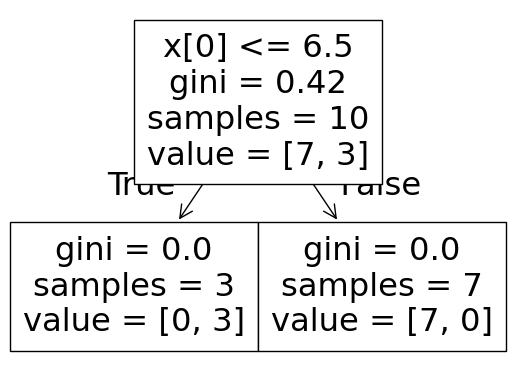

In [92]:
plot_tree(dt3)

<Axes: >

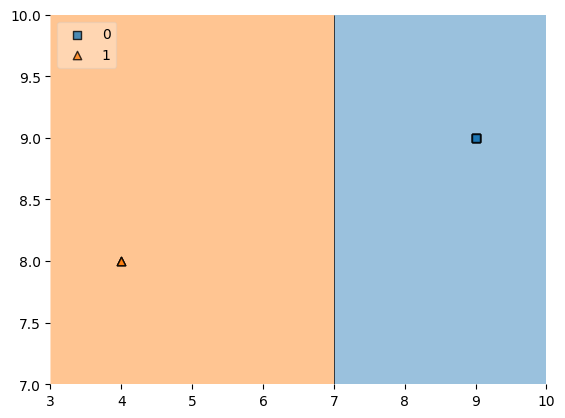

In [93]:
plot_decision_regions(x,y,clf=dt3,legend=2)

In [94]:
third_df['y_pred'] = dt3.predict(X)

In [95]:
third_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,1
8,9,9,0,0.1,1
8,9,9,0,0.1,1
3,4,8,1,0.1,0
8,9,9,0,0.1,1
3,4,8,1,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,1
8,9,9,0,0.1,1
8,9,9,0,0.1,0


In [ ]:
# error = 0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1=0.8

In [98]:
alpha3 = calculate_model_weight(0.8)
alpha3

np.float64(-0.6931471805599454)

In [99]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.6931471805599454


## Prediction

In [101]:
query = np.array([1,5]).reshape(1,2)

In [104]:
dt1.predict(query)

array([1])

In [102]:
dt2.predict(query)

array([1])

In [103]:
dt3.predict(query)

array([1])

In [ ]:
print(alpha1*1+alpha2*1+alpha3*1)


np.float64(0.8291140383017663)

In [106]:
np.sign(0.89)

np.float64(1.0)

In [107]:
query = np.array([9,9]).reshape(1,2)

In [108]:
dt1.predict(query)

array([1])

In [109]:
dt2.predict(query)

array([0])

In [110]:
dt3.predict(query)

array([0])

In [111]:
print(alpha1*0+alpha2*(-1)+alpha3*(-1))


-0.4054651081081644


In [112]:
np.sign(-0.40)

np.float64(-1.0)